In [3]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/51/31/72b8f5aa9ed9c4a6afd09c0bab491862ba5837facf7d81e1ed51a555ae8e/yfinance-0.2.44-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/86/20/2a2514d0b504e773078c38d664108bc8ae9056f85ea57c6fff86eee07331/frozendict-2.4.5-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 656.4 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 751.6 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.

In [5]:
import yfinance as yf
# Charger les données
ticker = 'AAPL'  # Par exemple, les données de l'action Apple
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')


data.isnull().sum()

[*********************100%***********************]  1 of 1 completed


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

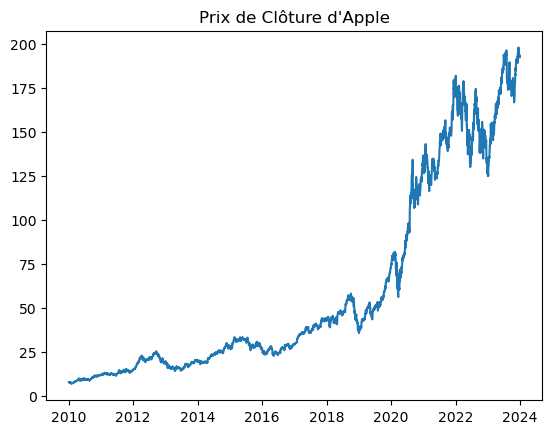

In [6]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])
plt.title('Prix de Clôture d\'Apple')
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
#qui est un outil pour normaliser les données. 
#La normalisation ramène les valeurs dans une plage spécifique (dans ce cas, entre 0 et 1).

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

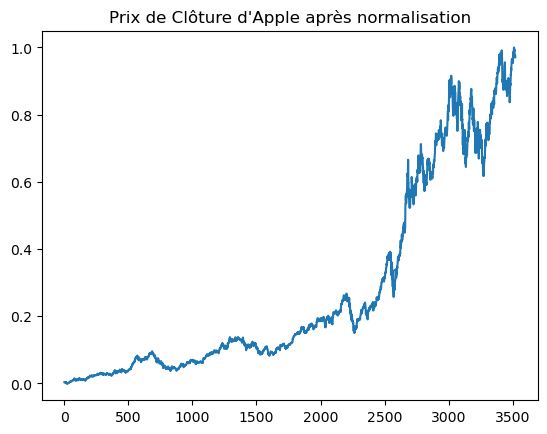

In [8]:
plt.plot(scaled_data)
plt.title('Prix de Clôture d\'Apple après normalisation')
plt.show()

In [9]:
# Création des séquences
import numpy as np
import pandas as pd
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [10]:
# Division en ensembles d'entraînement et de test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Définition du modèle RNN
model_rnn = Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(seq_length, 1)), # Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Affichage du résumé du modèle
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compilation du modèle
model_rnn.compile(optimizer='adam', loss='mse')

In [14]:
# Entraînement du modèle
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0269 - val_loss: 0.1036
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0023 - val_loss: 0.0277
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0367e-04 - val_loss: 0.0117
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3047e-04 - val_loss: 0.0096
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0686e-04 - val_loss: 0.0099
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.4686e-04 - val_loss: 0.0101
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.4225e-04 - val_loss: 0.0088
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.5722e-04 - val_loss: 0.0091
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.6146e-04 - val_loss: 0.0083
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.5124e-04 - val_loss: 0.0090
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.4817e-04 - val_loss: 0.0095
Epoch 12/20
87/87 ━━━━━━━━━

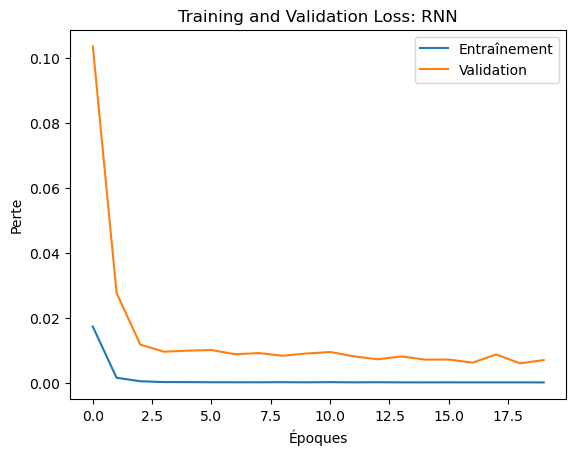

In [15]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_rnn.history['loss'], label='Entraînement')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036  
RNN Test Loss: 0.006983526982367039
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


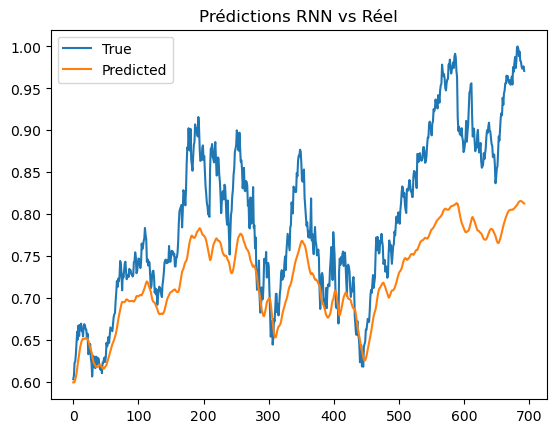

In [16]:
# Évaluation du modèle
loss_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Loss: {loss_rnn}")

# Prédictions
predictions_rnn = model_rnn.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(predictions_rnn, label='Predicted')
plt.legend()
plt.title('Prédictions RNN vs Réel')
plt.show()

In [17]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Définition du modèle RNN
model_rnn2 = Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(seq_length, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    SimpleRNN(units=20, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

# Affichage du résumé du modèle
model_rnn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 20)                  │           1,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,041 (15.79 KB)

 Trainable params: 4,041 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compilation du modèle
model_rnn2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_rnn2 = model_rnn2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0218 - val_loss: 0.0360
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.0989e-04 - val_loss: 0.0323
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.9939e-04 - val_loss: 0.0159
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.8900e-04 - val_loss: 0.0082
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.3074e-04 - val_loss: 0.0055
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.7633e-04 - val_loss: 0.0046
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 1.5925e-04 - val_loss: 0.0044
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.2032e-04 - val_loss: 0.0040
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.2771e-04 - val_loss: 0.0036
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 1.3376e-04 - val_loss: 0.0036
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.3156e-04 - val_loss: 0.0042
Epoch 12/20
87/87 ━━━━